In [2]:
%pip install seaborn

In [3]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme()

In [4]:
# Chargement des données
df = pd.read_csv('twitter_validation.csv')
df

,id,source,sentiment,texte
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
# Afficher un aperçu des données
df.head()

,id,source,sentiment,texte
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [6]:
df.duplicated().sum()
df.isna().sum()

id           0
source       0
sentiment    0
texte        0
dtype: int64

In [7]:
(df == 0).sum()

id           0
source       0
sentiment    0
texte        0
dtype: int64

<AxesSubplot:>

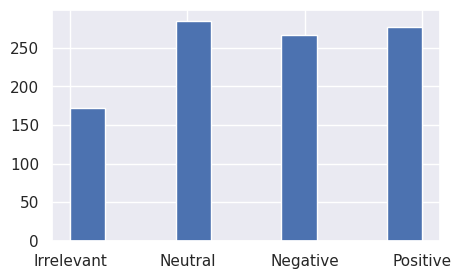

In [8]:
plt.figure(figsize=(5,3))
df.sentiment.hist()

# Train-test set

In [9]:
# Suppression des sentiments "irrelevant"
df = df[df.sentiment!="Irrelevant"]

<AxesSubplot:>

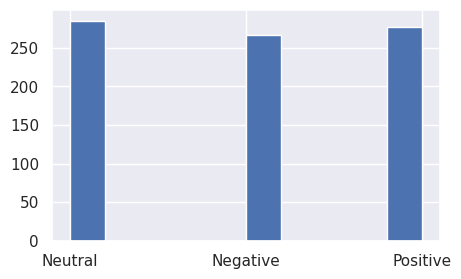

In [10]:
plt.figure(figsize=(5,3))
df.sentiment.hist()

In [11]:
# split data
X = df.texte
y = df.sentiment

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((662,), (662,), (166,), (166,))

# Model and Results

In [14]:
# Pour transformer du string en int et utiliser la méthode LogisticRegression
pipeline = Pipeline([('tdidf', TfidfVectorizer()),("LogisticRegression", LogisticRegression())])

In [15]:
model = pipeline
model.fit(X_train, y_train)

y_train_preds = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [16]:
model.fit(X_train, y_train)

Pipeline(steps=[('tdidf', TfidfVectorizer()),
                ('LogisticRegression', LogisticRegression())])

In [17]:
print(classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

    Negative     0.6200    0.5636    0.5905        55
     Neutral     0.4265    0.6304    0.5088        46
    Positive     0.6667    0.4923    0.5664        65

    accuracy                         0.5542       166
   macro avg     0.5710    0.5621    0.5552       166
weighted avg     0.5846    0.5542    0.5584       166



In [18]:
print(classification_report(y_train, y_train_preds, digits=4))

              precision    recall  f1-score   support

    Negative     0.9481    0.9526    0.9504       211
     Neutral     0.9500    0.9540    0.9520       239
    Positive     0.9762    0.9670    0.9716       212

    accuracy                         0.9577       662
   macro avg     0.9581    0.9579    0.9580       662
weighted avg     0.9578    0.9577    0.9577       662



# Exportation du model

In [19]:
# Exporter le model en model.pkl
with open('model.pkl', 'wb') as file:
    pickle.dump(y_test_pred, file)

In [20]:
with open("model.pkl", "rb") as f:
    new_model = pickle.load(f)

In [21]:
y_hat = new_model.predict(X_test)
print(classification_report(y_test, y_hat, digits=4))

<class 'AttributeError'>: 'numpy.ndarray' object has no attribute 'predict'